In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("energy_data.csv")


df['timestamp'] = pd.to_datetime(df['timestamp'])

df = df.set_index('timestamp')

df.head()

,fridge,ac,lights,microwave,total_power
timestamp,,,,,
2023-01-01 00:00:00,98,0,55,0,153
2023-01-01 01:00:00,157,0,72,0,229
2023-01-01 02:00:00,0,0,77,0,77
2023-01-01 03:00:00,0,0,78,0,78
2023-01-01 04:00:00,142,2129,76,0,2347


In [3]:
df['hour'] = df.index.hour
df['day'] = df.index.day
df['day_name'] = df.index.day_name()
df['week'] = df.index.isocalendar().week
df['month'] = df.index.month
df['month_name'] = df.index.strftime('%B')

df.head()

,fridge,ac,lights,microwave,total_power,hour,day,day_name,week,month,month_name
timestamp,,,,,,,,,,,
2023-01-01 00:00:00,98,0,55,0,153,0,1,Sunday,52,1,January
2023-01-01 01:00:00,157,0,72,0,229,1,1,Sunday,52,1,January
2023-01-01 02:00:00,0,0,77,0,77,2,1,Sunday,52,1,January
2023-01-01 03:00:00,0,0,78,0,78,3,1,Sunday,52,1,January
2023-01-01 04:00:00,142,2129,76,0,2347,4,1,Sunday,52,1,January


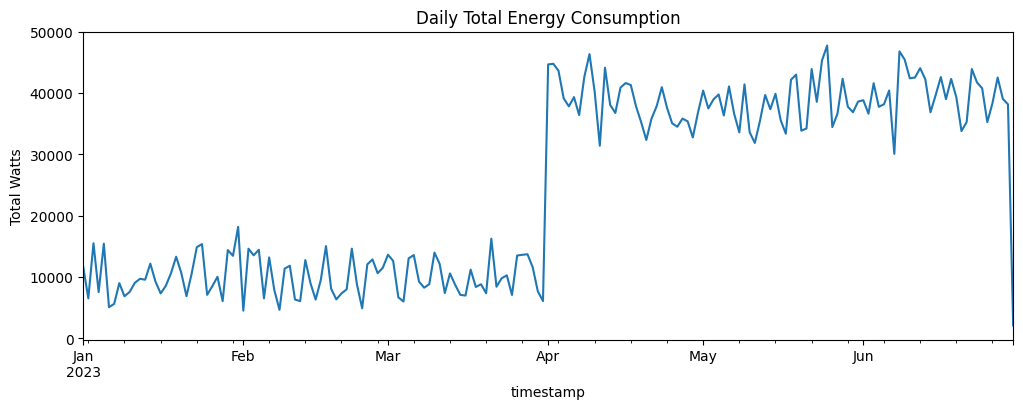

In [4]:
daily_usage = df.resample('D')['total_power'].sum()

plt.figure(figsize=(12,4))
daily_usage.plot()
plt.title("Daily Total Energy Consumption")
plt.ylabel("Total Watts")
plt.show()

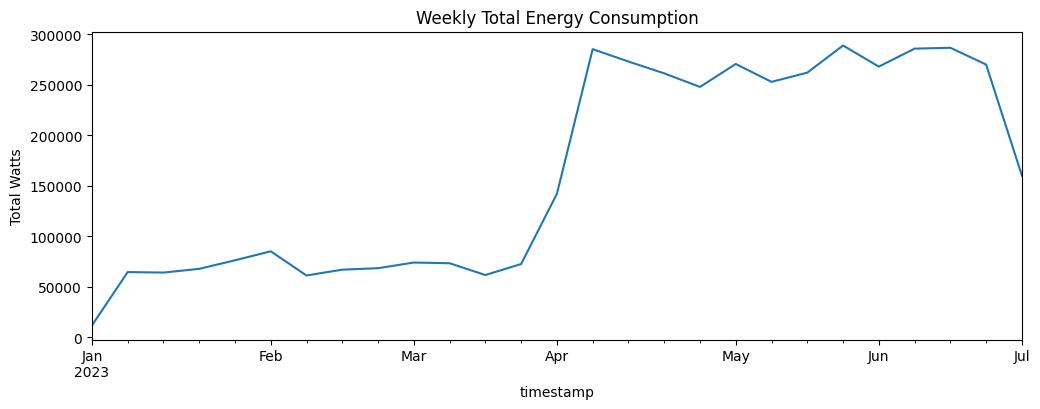

In [5]:
weekly_usage = df.resample('W')['total_power'].sum()

plt.figure(figsize=(12,4))
weekly_usage.plot()
plt.title("Weekly Total Energy Consumption")
plt.ylabel("Total Watts")
plt.show()

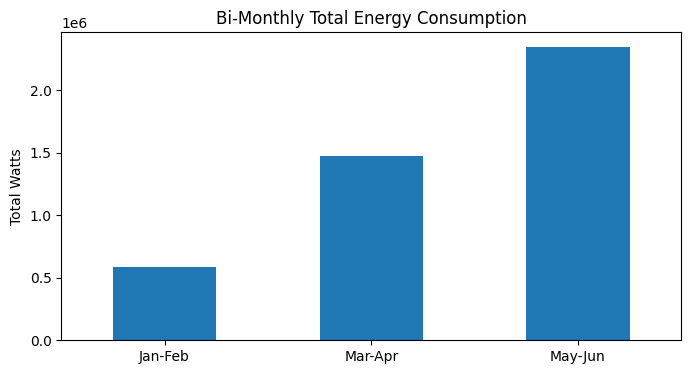

In [10]:
# Monthly total (Month End)
monthly_total = df.resample('ME')['total_power'].sum()

#  bi-month grouping number
bi_month_number = (monthly_total.index.month - 1) // 2

# Grouped every 2 months
bi_month = monthly_total.groupby(bi_month_number).sum()


bi_month.index = ['Jan-Feb','Mar-Apr','May-Jun']


plt.figure(figsize=(8,4))
bi_month.plot(kind='bar')
plt.title("Bi-Monthly Total Energy Consumption")
plt.ylabel("Total Watts")
plt.xticks(rotation=0)
plt.show()

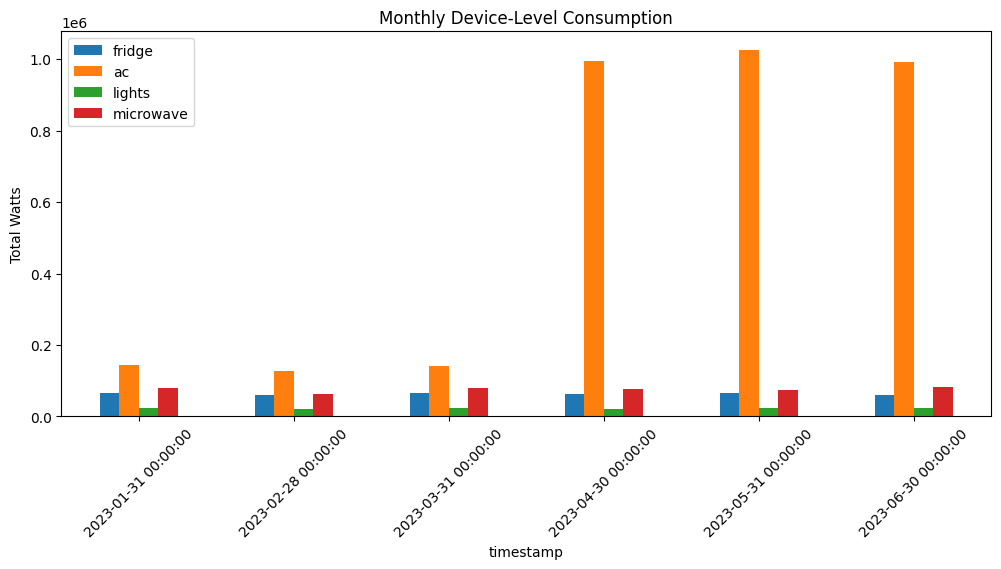

In [11]:
appliances = ['fridge','ac','lights','microwave']

device_monthly = df.resample('ME')[appliances].sum()

device_monthly.plot(kind='bar', figsize=(12,5))
plt.title("Monthly Device-Level Consumption")
plt.ylabel("Total Watts")
plt.xticks(rotation=45)
plt.show()

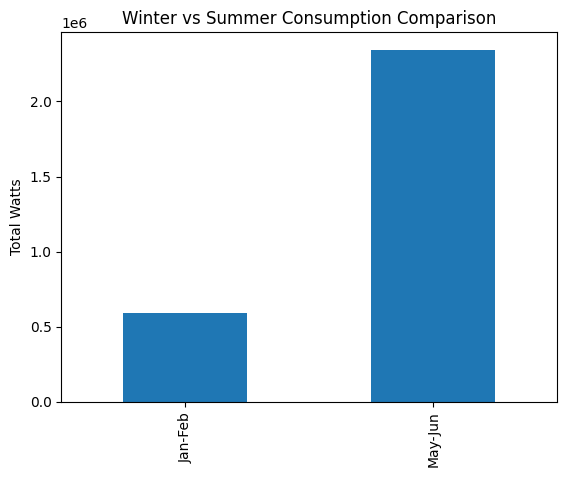

In [12]:
jan_feb = df['2023-01':'2023-02']['total_power'].sum()
may_june = df['2023-05':'2023-06']['total_power'].sum()

comparison = pd.Series([jan_feb, may_june], 
                       index=['Jan-Feb','May-Jun'])

comparison.plot(kind='bar')
plt.title("Winter vs Summer Consumption Comparison")
plt.ylabel("Total Watts")
plt.show()

In [13]:
df['lag_1'] = df['total_power'].shift(1)
df['lag_24'] = df['total_power'].shift(24)  

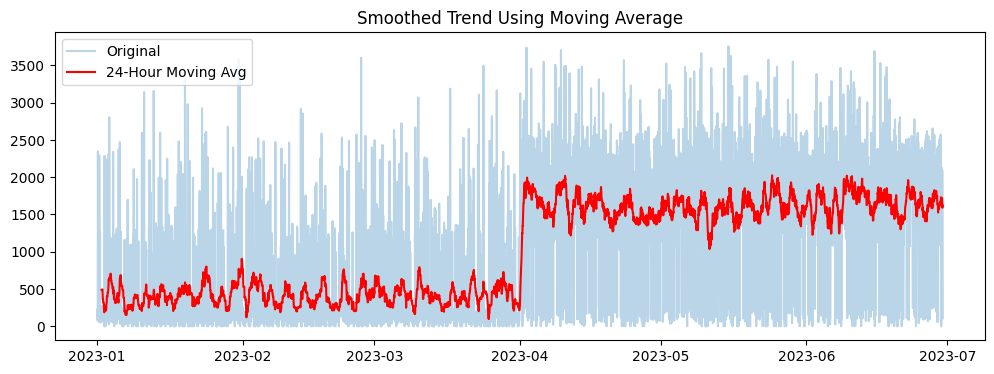

In [14]:
df['rolling_24hr_avg'] = df['total_power'].rolling(24).mean()

plt.figure(figsize=(12,4))
plt.plot(df['total_power'], alpha=0.3, label='Original')
plt.plot(df['rolling_24hr_avg'], color='red', label='24-Hour Moving Avg')
plt.legend()
plt.title("Smoothed Trend Using Moving Average")
plt.show()

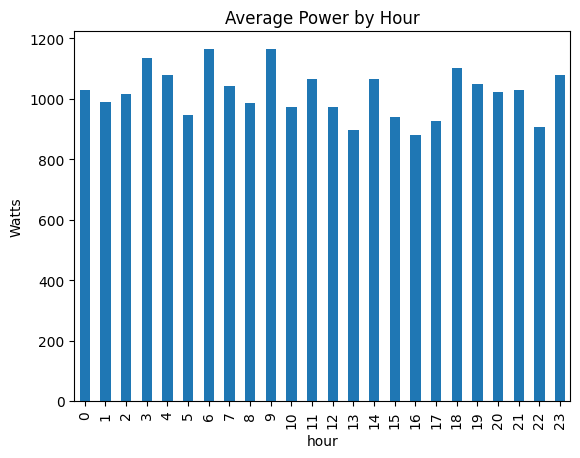

In [15]:
hourly_avg = df.groupby('hour')['total_power'].mean()

hourly_avg.plot(kind='bar')
plt.title("Average Power by Hour")
plt.ylabel("Watts")
plt.show()

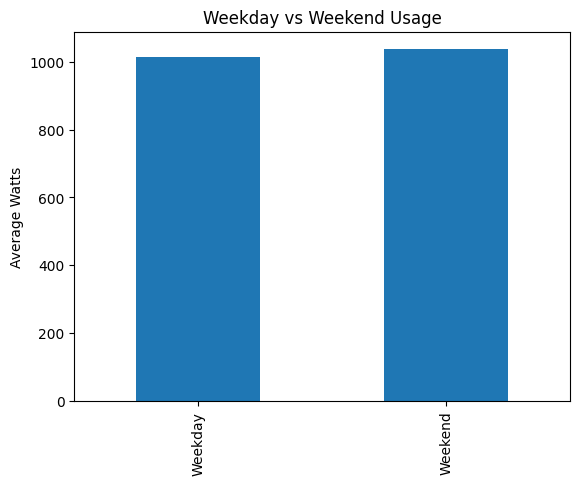

In [16]:
df['is_weekend'] = df.index.dayofweek >= 5

week_compare = df.groupby('is_weekend')['total_power'].mean()

week_compare.index = ['Weekday','Weekend']
week_compare.plot(kind='bar')
plt.title("Weekday vs Weekend Usage")
plt.ylabel("Average Watts")
plt.show()

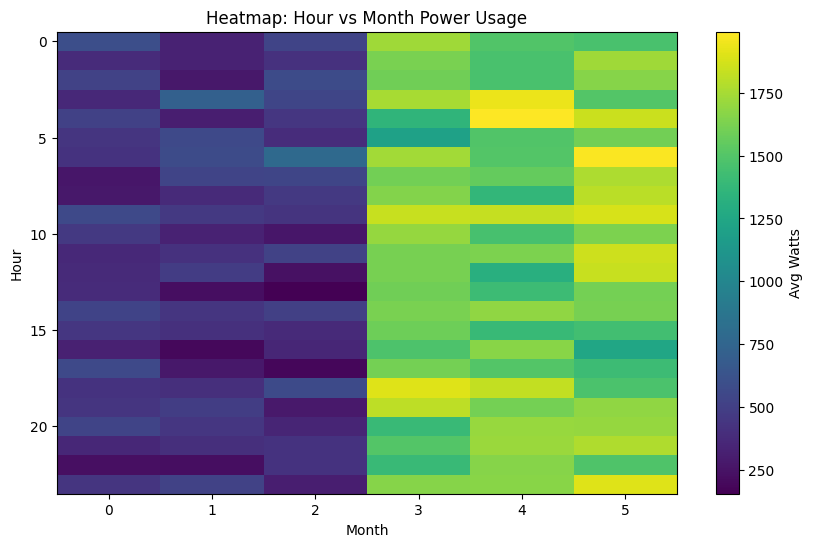

In [17]:
pivot = df.pivot_table(values='total_power',
                       index='hour',
                       columns='month',
                       aggfunc='mean')

plt.figure(figsize=(10,6))
plt.imshow(pivot, aspect='auto')
plt.colorbar(label="Avg Watts")
plt.title("Heatmap: Hour vs Month Power Usage")
plt.xlabel("Month")
plt.ylabel("Hour")
plt.show()

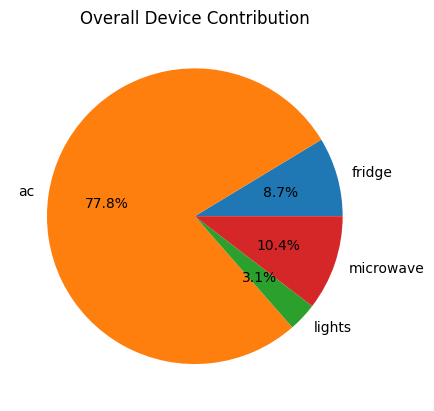

In [18]:
device_total = df[['fridge','ac','lights','microwave']].sum()

device_total.plot(kind='pie', autopct='%1.1f%%')
plt.title("Overall Device Contribution")
plt.ylabel("")
plt.show()

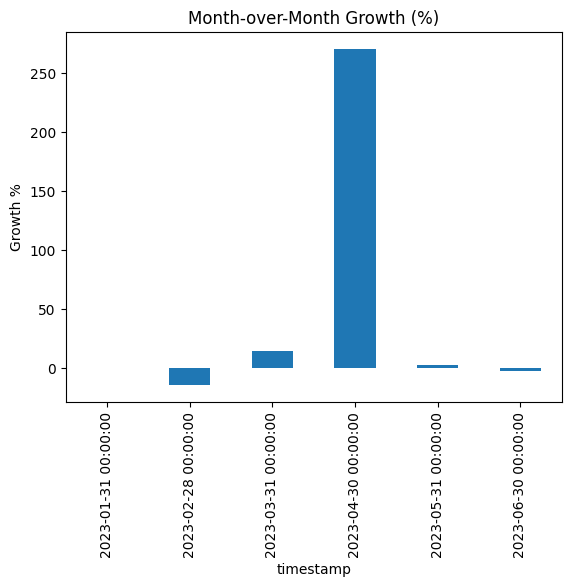

In [19]:
monthly_total = df.resample('ME')['total_power'].sum()

growth = monthly_total.pct_change() * 100

growth.plot(kind='bar')
plt.title("Month-over-Month Growth (%)")
plt.ylabel("Growth %")
plt.show()

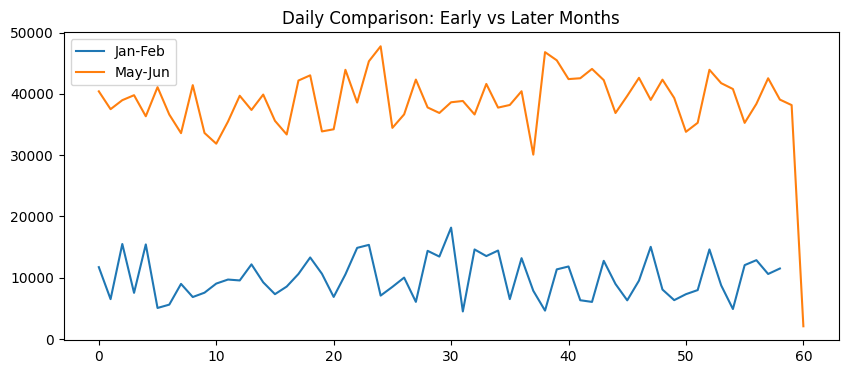

In [20]:
first_2 = df['2023-01':'2023-02'].resample('D')['total_power'].sum()
last_2 = df['2023-05':'2023-06'].resample('D')['total_power'].sum()

plt.figure(figsize=(10,4))
plt.plot(first_2.values, label='Jan-Feb')
plt.plot(last_2.values, label='May-Jun')
plt.legend()
plt.title("Daily Comparison: Early vs Later Months")
plt.show()

array([[<Axes: title={'center': 'fridge'}>,
        <Axes: title={'center': 'ac'}>,
        <Axes: title={'center': 'lights'}>],
       [<Axes: title={'center': 'microwave'}>,
        <Axes: title={'center': 'total_power'}>,
        <Axes: title={'center': 'hour'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'week'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'lag_1'}>,
        <Axes: title={'center': 'lag_24'}>,
        <Axes: title={'center': 'rolling_24hr_avg'}>]], dtype=object)

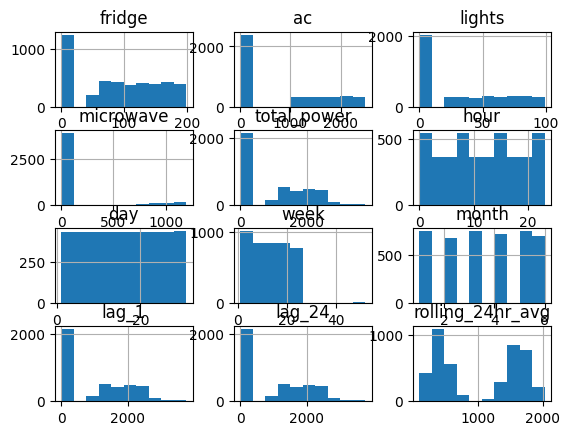

In [21]:
df.hist()

In [23]:
appliances = ['fridge','ac','lights','microwave']

stats = df[appliances].agg(['mean','std']).T

print(stats)

                 mean         std
fridge      88.253876   66.721048
ac         793.253414  920.159392
lights      31.947697   34.423581
microwave  106.095811  311.144824


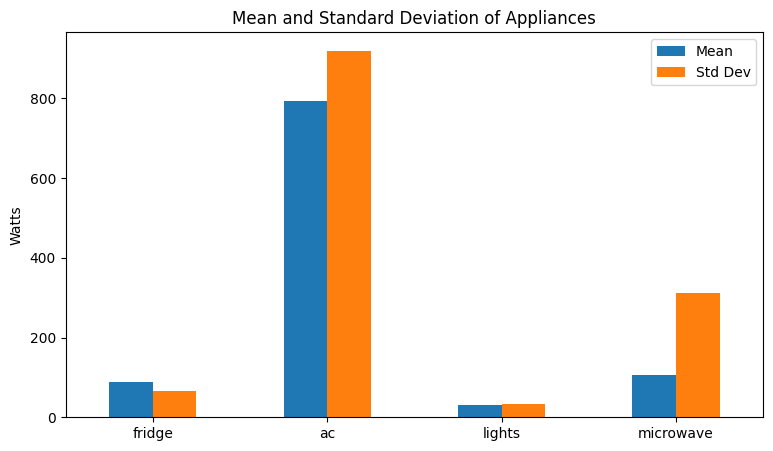

In [24]:
import matplotlib.pyplot as plt

stats.plot(kind='bar', figsize=(9,5))
plt.title("Mean and Standard Deviation of Appliances")
plt.ylabel("Watts")
plt.xticks(rotation=0)
plt.legend(['Mean','Std Dev'])
plt.show()

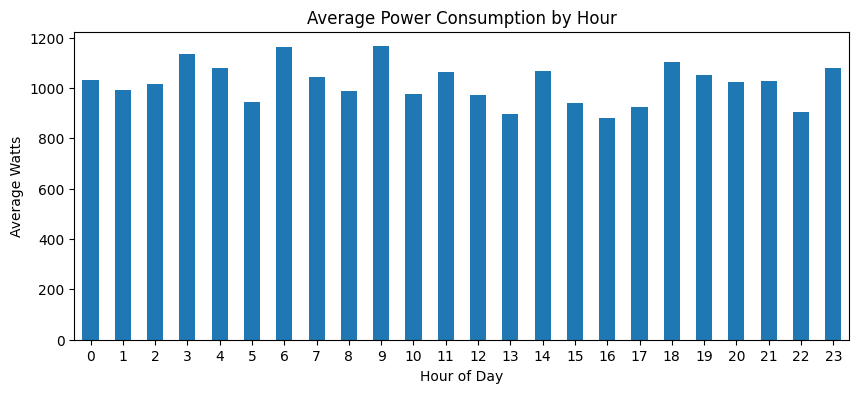

In [26]:

hourly_avg = df.groupby('hour')['total_power'].mean()

plt.figure(figsize=(10,4))
hourly_avg.plot(kind='bar')
plt.title("Average Power Consumption by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Watts")
plt.xticks(rotation=0)
plt.show()

In [27]:
peak_hour = df['total_power'].idxmax()
peak_value = df['total_power'].max()

print("Peak occurred at:", peak_hour)
print("Peak power (Watts):", peak_value)

Peak occurred at: 2023-05-15 10:00:00
Peak power (Watts): 3757


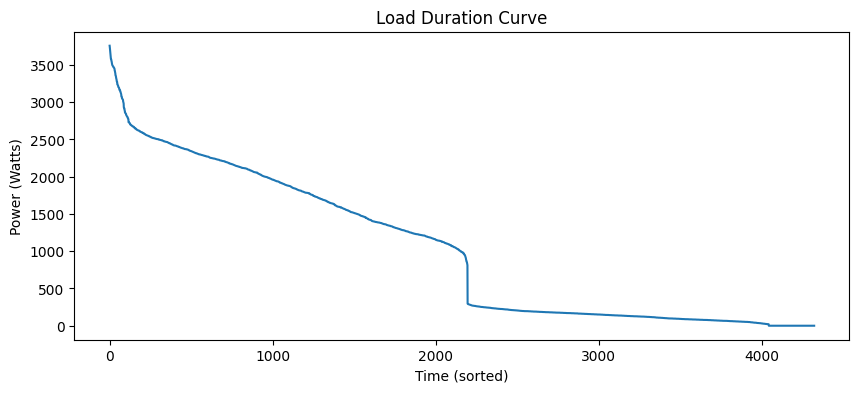

In [28]:
sorted_power = df['total_power'].sort_values(ascending=False).reset_index(drop=True)

plt.figure(figsize=(10,4))
plt.plot(sorted_power)
plt.title("Load Duration Curve")
plt.xlabel("Time (sorted)")
plt.ylabel("Power (Watts)")
plt.show()

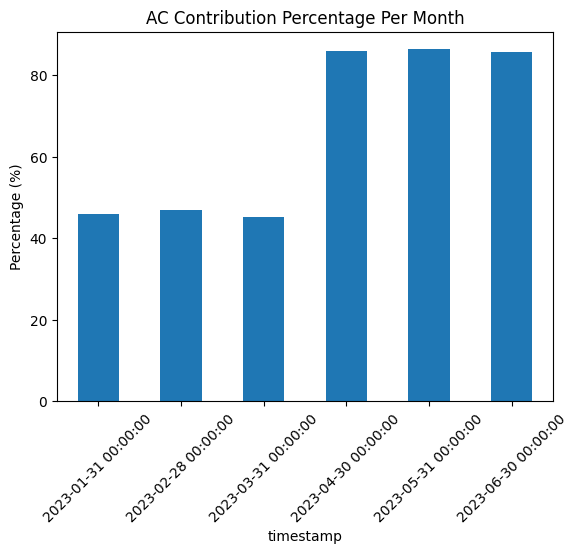

In [30]:
monthly = df.resample('ME').sum()

monthly['ac_percentage'] = (monthly['ac'] / monthly['total_power']) * 100

monthly['ac_percentage'].plot(kind='bar')
plt.title("AC Contribution Percentage Per Month")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.show()

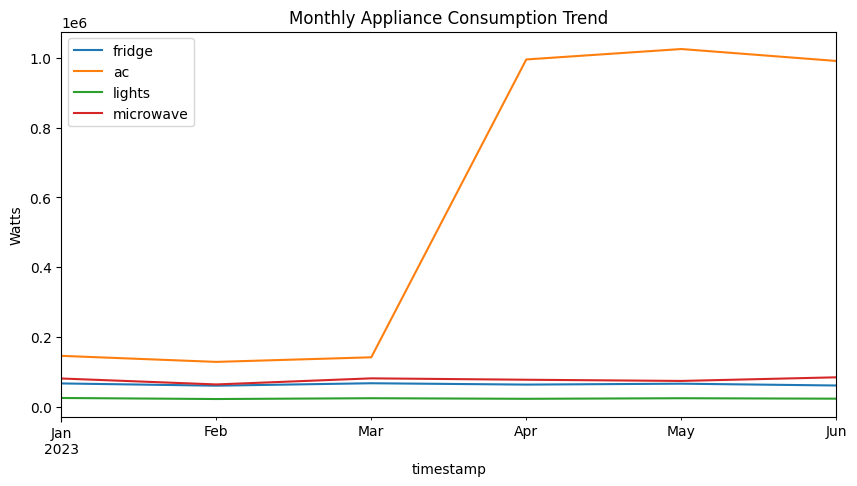

In [31]:
monthly_device = df.resample('ME')[['fridge','ac','lights','microwave']].sum()

monthly_device.plot(figsize=(10,5))
plt.title("Monthly Appliance Consumption Trend")
plt.ylabel("Watts")
plt.show()

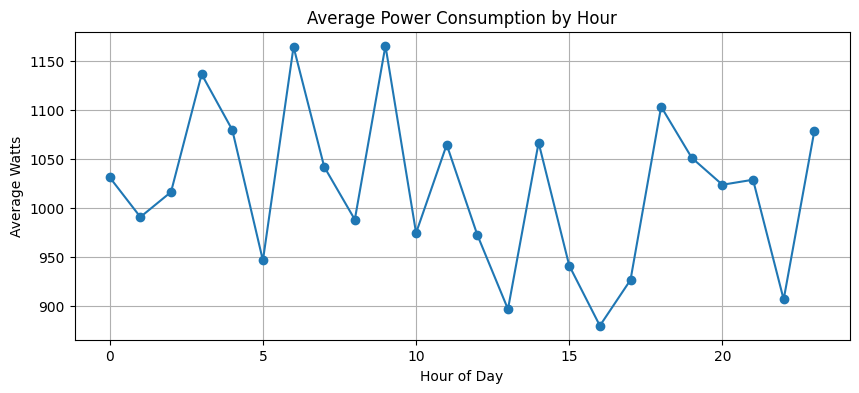

In [32]:
# Average total power by hour
hourly_avg = df.groupby('hour')['total_power'].mean()

plt.figure(figsize=(10,4))
plt.plot(hourly_avg, marker='o')
plt.title("Average Power Consumption by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Watts")
plt.grid(True)
plt.show()

<Figure size 1200x500 with 0 Axes>

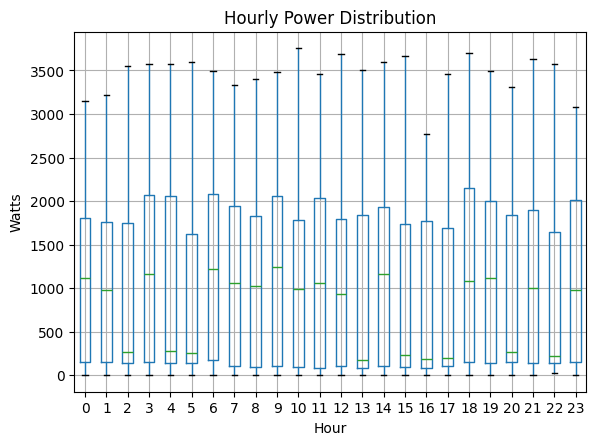

In [33]:
plt.figure(figsize=(12,5))
df.boxplot(column='total_power', by='hour')
plt.title("Hourly Power Distribution")
plt.suptitle("")
plt.xlabel("Hour")
plt.ylabel("Watts")
plt.show()